<a href="https://colab.research.google.com/github/Liqgy/6610412007/blob/main/Monsicha6610412007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [3]:
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4448    0  4448    0     0  16252      0 --:--:-- --:--:-- --:--:-- 16293
100  517k  100  517k    0     0   710k      0 --:--:-- --:--:-- --:--:--  710k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4448    0  4448    0     0  18226      0 --:--:-- --:--:-- --:--:-- 18229
100  392k  100  392k    0     0   642k      0 --:--:-- --:--:-- --:--:--  642k


In [4]:
# Technical Indicators
import talib as ta
# Plotting graphs
import matplotlib.pyplot as plt
# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [5]:
cbg= yf.Ticker('cbg.bk')
interval = '1h'
start = '2023-2-10'
end = '2024-2-10'
df = cbg.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-02-10 10:00:00+07:00,100.00,100.50,99.75,100.00,0,0.0,0.0
2023-02-10 11:00:00+07:00,100.00,100.50,100.00,100.50,171952,0.0,0.0
2023-02-10 12:00:00+07:00,100.50,100.50,100.00,100.50,6901,0.0,0.0
2023-02-10 14:00:00+07:00,100.00,100.50,100.00,100.00,163604,0.0,0.0
2023-02-10 15:00:00+07:00,100.00,100.50,100.00,100.50,205727,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,72.50,72.75,72.25,72.25,745468,0.0,0.0
2024-02-09 12:00:00+07:00,72.25,72.25,72.00,72.25,194300,0.0,0.0
2024-02-09 14:00:00+07:00,72.25,72.50,72.00,72.25,81535,0.0,0.0


In [6]:
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:12]

In [7]:
X

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,,,,
2023-02-15 10:00:00+07:00,100.50,101.00,99.50,100.00,0,0.0,0.0,100.825,0.180003,43.846188,0.75,0.50
2023-02-15 11:00:00+07:00,100.50,100.50,99.50,99.75,215583,0.0,0.0,100.700,0.430783,40.680869,0.50,0.00
2023-02-15 12:00:00+07:00,99.75,99.75,99.50,99.75,17759,0.0,0.0,100.575,0.594532,40.680869,0.00,-0.75
2023-02-15 14:00:00+07:00,99.75,100.00,99.25,99.25,264952,0.0,0.0,100.350,0.762892,34.526505,0.00,0.00
2023-02-15 15:00:00+07:00,99.25,99.50,99.25,99.25,424418,0.0,0.0,100.125,0.821181,34.526505,0.00,-0.50
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,72.50,72.75,72.25,72.25,745468,0.0,0.0,72.350,0.735111,37.084100,0.00,0.50
2024-02-09 12:00:00+07:00,72.25,72.25,72.00,72.25,194300,0.0,0.0,72.275,0.606346,37.084100,0.00,-0.25
2024-02-09 14:00:00+07:00,72.25,72.50,72.00,72.25,81535,0.0,0.0,72.175,0.186120,37.084100,0.00,0.00


In [8]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
#shift-1 for shift up to tomorrow close price

In [9]:
split = int(0.7*len(df))
#train70% และ test 30%
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [10]:
model = LogisticRegression()
model = model.fit(X_train,y_train)

In [11]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.001549006046830422]
1,High,[-0.0015540106848044464]
2,Low,[-0.0015438933186894376]
3,Close,[-0.0015511211876958933]
4,Volume,[-3.7299947192512996e-08]
5,Dividends,[-1.1811780409332056e-07]
6,Stock Splits,[0.0]
7,S_10,[-0.001553926267046872]
8,Corr,[-6.494045501002103e-06]
9,RSI,[-0.0008131905183061224]


In [12]:
probability = model.predict_proba(X_test)
print(probability)

[[0.63972005 0.36027995]
 [0.63148931 0.36851069]
 [0.6424469  0.3575531 ]
 [0.6307086  0.3692914 ]
 [0.63277726 0.36722274]
 [0.63585493 0.36414507]
 [0.63396514 0.36603486]
 [0.6302872  0.3697128 ]
 [0.63539516 0.36460484]
 [0.63110703 0.36889297]
 [0.63413634 0.36586366]
 [0.65744291 0.34255709]
 [0.64546512 0.35453488]
 [0.6356723  0.3643277 ]
 [0.63861282 0.36138718]
 [0.63635465 0.36364535]
 [0.64036516 0.35963484]
 [0.64007459 0.35992541]
 [0.63803559 0.36196441]
 [0.63937526 0.36062474]
 [0.64640194 0.35359806]
 [0.64021765 0.35978235]
 [0.64471061 0.35528939]
 [0.65374176 0.34625824]
 [0.64556629 0.35443371]
 [0.64177306 0.35822694]
 [0.67579199 0.32420801]
 [0.65472745 0.34527255]
 [0.65669501 0.34330499]
 [0.65778403 0.34221597]
 [0.6570351  0.3429649 ]
 [0.64812842 0.35187158]
 [0.65513708 0.34486292]
 [0.65097122 0.34902878]
 [0.65317045 0.34682955]
 [0.65796588 0.34203412]
 [0.6534433  0.3465567 ]
 [0.64958287 0.35041713]
 [0.65776632 0.34223368]
 [0.65342116 0.34657884]


In [13]:
predicted = model.predict(X_test)
print(predicted)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [14]:
df_test_predicted = X_test.copy()
df_test_predicted['Predicted'] = predicted
buying_dates = df_test_predicted[df_test_predicted['Predicted'] == 1].index
print(buying_dates)

DatetimeIndex([], dtype='datetime64[ns, Asia/Bangkok]', name='Datetime', freq=None)


In [15]:
print(metrics.confusion_matrix(y_test, predicted))

[[275   0]
 [158   0]]


In [16]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

          -1       0.64      1.00      0.78       275
           1       0.00      0.00      0.00       158

    accuracy                           0.64       433
   macro avg       0.32      0.50      0.39       433
weighted avg       0.40      0.64      0.49       433



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-17-30ef69a975ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Predicted_Signal'] = model.predict(X)
<ipython-input-17-30ef69a975ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cbg_returns'] = np.log(df['Close']/df['Close'].shift(1))
<ipython-input-17-30ef69a975ed>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

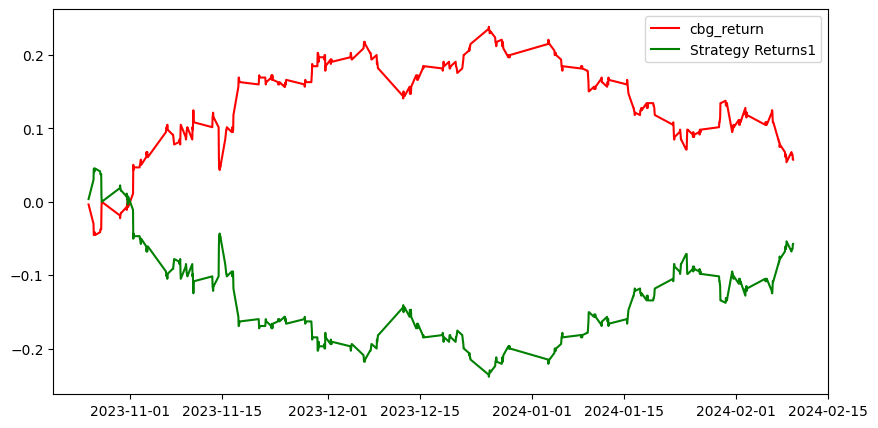

In [17]:
df['Predicted_Signal'] = model.predict(X)
df['cbg_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_cbg_returns = np.cumsum(df[split:]['cbg_returns'])

df['Strategy_returns1'] = df['cbg_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns1 = np.cumsum(df[split:]['Strategy_returns1'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_cbg_returns, color='r', label = 'cbg_return')
plt.plot(Cumulative_Strategy_returns1, color='g', label = 'Strategy Returns1')
plt.legend()
plt.show()

In [18]:
osp= yf.Ticker('osp.bk')
interval = '1h'
start = '2023-2-10'
end = '2024-2-10'
df2 = osp.history(interval=interval,start=start,end=end)
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-02-10 10:00:00+07:00,28.750000,28.750000,28.250000,28.500000,0,0.0,0.0
2023-02-10 11:00:00+07:00,28.250000,28.500000,28.250000,28.250000,49487,0.0,0.0
2023-02-10 12:00:00+07:00,28.250000,28.500000,28.250000,28.500000,9716,0.0,0.0
2023-02-10 14:00:00+07:00,28.250000,28.500000,28.250000,28.500000,27450,0.0,0.0
2023-02-10 15:00:00+07:00,28.250000,28.500000,28.250000,28.250000,234847,0.0,0.0
...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,20.799999,20.900000,20.700001,20.799999,451036,0.0,0.0
2024-02-09 12:00:00+07:00,20.799999,20.799999,20.700001,20.799999,141000,0.0,0.0
2024-02-09 14:00:00+07:00,20.799999,20.900000,20.700001,20.799999,161600,0.0,0.0


In [19]:
df2['S_10'] = df2['Close'].rolling(window=10).mean()
df2['Corr'] = df2['Close'].rolling(window=10).corr(df2['S_10'])
df2['RSI2'] = ta.RSI(np.array(df2['Close']), timeperiod =10)
df2['Open-Close'] = df2['Open'] - df2['Close'].shift(1)
df2['Open-Open'] = df2['Open'] - df2['Open'].shift(1)
df2 = df2.dropna()
X2 = df2.iloc[:,:15]
X2

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI2,Open-Close,Open-Open
Datetime,,,,,,,,,,,,
2023-02-15 10:00:00+07:00,28.250000,28.500000,28.000000,28.250000,0,0.0,0.0,28.325,0.717002,41.467577,0.000000,0.000000
2023-02-15 11:00:00+07:00,28.250000,28.250000,28.000000,28.000000,126480,0.0,0.0,28.275,0.824154,30.563148,0.000000,0.000000
2023-02-15 12:00:00+07:00,28.250000,28.250000,28.000000,28.250000,173710,0.0,0.0,28.250,0.653876,46.263828,0.250000,0.000000
2023-02-15 14:00:00+07:00,28.000000,28.750000,28.000000,28.500000,3715850,0.0,0.0,28.250,-0.111803,57.053609,-0.250000,-0.250000
2023-02-15 15:00:00+07:00,28.500000,28.500000,28.250000,28.500000,744875,0.0,0.0,28.275,-0.257513,57.053609,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,20.799999,20.900000,20.700001,20.799999,451036,0.0,0.0,21.010,0.977081,30.650268,0.000000,-0.200001
2024-02-09 12:00:00+07:00,20.799999,20.799999,20.700001,20.799999,141000,0.0,0.0,20.970,0.954805,30.650268,0.000000,0.000000
2024-02-09 14:00:00+07:00,20.799999,20.900000,20.700001,20.799999,161600,0.0,0.0,20.930,0.909839,30.650268,0.000000,0.000000


In [20]:
y2 = np.where(df2['Close'].shift(-1) > df2['Close'],1,-1)
#shift-1 for shift up to tomorrow close price

In [21]:
split = int(0.7*len(df))
#train70% และ test 30%
X2_train, X2_test, y2_train, y2_test = X2[:split], X2[split:], y2[:split], y2[split:]

In [22]:
model2 = LogisticRegression()
model2 = model.fit(X2_train,y2_train)

In [23]:
pd.DataFrame(zip(X2.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.004177579775921313]
1,High,[-0.004198612997734548]
2,Low,[-0.004154532929758376]
3,Close,[-0.004200623566759253]
4,Volume,[6.337645102078073e-08]
5,Dividends,[-2.9491034488410193e-07]
6,Stock Splits,[0.0]
7,S_10,[-0.004193339786672666]
8,Corr,[-4.131472783796986e-05]
9,RSI2,[-0.0071968292836389345]


In [24]:
probability2 = model.predict_proba(X2_test)
print(probability2)

[[0.68467372 0.31532628]
 [0.69401323 0.30598677]
 [0.64778457 0.35221543]
 [0.67646791 0.32353209]
 [0.65958897 0.34041103]
 [0.60924217 0.39075783]
 [0.65709716 0.34290284]
 [0.67252467 0.32747533]
 [0.66945891 0.33054109]
 [0.68301208 0.31698792]
 [0.6880643  0.3119357 ]
 [0.663042   0.336958  ]
 [0.7043731  0.2956269 ]
 [0.70310772 0.29689228]
 [0.68247485 0.31752515]
 [0.68590046 0.31409954]
 [0.69836677 0.30163323]
 [0.69472895 0.30527105]
 [0.70957867 0.29042133]
 [0.70902553 0.29097447]
 [0.67191816 0.32808184]
 [0.68355561 0.31644439]
 [0.68998971 0.31001029]
 [0.68460657 0.31539343]
 [0.67981238 0.32018762]
 [0.70499429 0.29500571]
 [0.70243923 0.29756077]
 [0.68668993 0.31331007]
 [0.69482573 0.30517427]
 [0.69290103 0.30709897]
 [0.70843695 0.29156305]
 [0.73309129 0.26690871]
 [0.69028012 0.30971988]
 [0.70473581 0.29526419]
 [0.68314757 0.31685243]
 [0.71131069 0.28868931]
 [0.69982372 0.30017628]
 [0.68333343 0.31666657]
 [0.70787009 0.29212991]
 [0.73296277 0.26703723]


In [25]:
predicted2 = model.predict(X2_test)
print(predicted2)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [26]:
df_test_predicted = X_test.copy()
df_test_predicted['Predicted'] = predicted
buying_dates = df_test_predicted[df_test_predicted['Predicted'] == 1].index
print(buying_dates)

DatetimeIndex([], dtype='datetime64[ns, Asia/Bangkok]', name='Datetime', freq=None)


In [27]:
print(metrics.classification_report(y2_test, predicted2))

              precision    recall  f1-score   support

          -1       0.68      1.00      0.81       293
           1       1.00      0.01      0.01       140

    accuracy                           0.68       433
   macro avg       0.84      0.50      0.41       433
weighted avg       0.78      0.68      0.55       433



<ipython-input-28-5453f62b7ab1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Predicted_Signal'] = model.predict(X2)
<ipython-input-28-5453f62b7ab1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['osp_returns'] = np.log(df2['Close']/df2['Close'].shift(1))
<ipython-input-28-5453f62b7ab1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

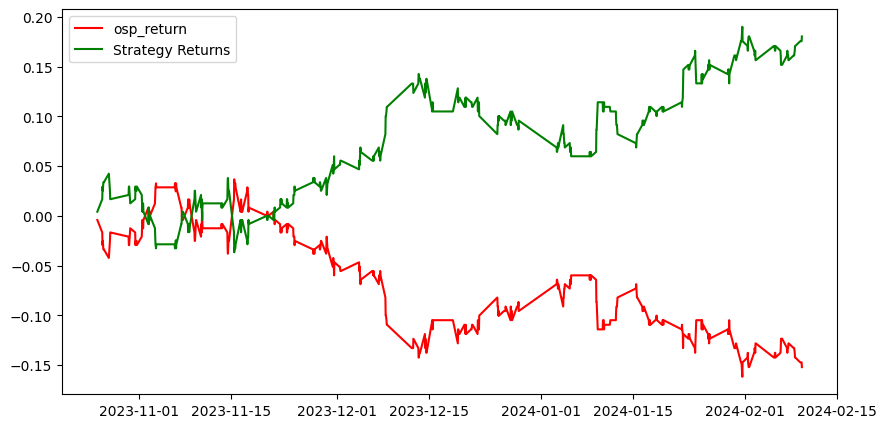

In [28]:
df2['Predicted_Signal'] = model.predict(X2)
df2['osp_returns'] = np.log(df2['Close']/df2['Close'].shift(1))
Cumulative_osp_returns = np.cumsum(df2[split:]['osp_returns'])


df2['Strategy_returns'] = df2['osp_returns']* df2['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df2[split:]['Strategy_returns'])
plt.figure(figsize=(10,5))
plt.plot(Cumulative_osp_returns, color='r', label = 'osp_return')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [29]:
newdf = pd.merge(df,df2['RSI2'],on ='Datetime' )

In [30]:
newdf

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI,Open-Close,Open-Open,Predicted_Signal,cbg_returns,Strategy_returns1,RSI2
Datetime,,,,,,,,,,,,,,,,
2023-02-15 10:00:00+07:00,100.50,101.00,99.50,100.00,0,0.0,0.0,100.825,0.180003,43.846188,0.75,0.50,-1,NaN,NaN,41.467577
2023-02-15 11:00:00+07:00,100.50,100.50,99.50,99.75,215583,0.0,0.0,100.700,0.430783,40.680869,0.50,0.00,-1,-0.002503,0.002503,30.563148
2023-02-15 12:00:00+07:00,99.75,99.75,99.50,99.75,17759,0.0,0.0,100.575,0.594532,40.680869,0.00,-0.75,-1,0.000000,-0.000000,46.263828
2023-02-15 14:00:00+07:00,99.75,100.00,99.25,99.25,264952,0.0,0.0,100.350,0.762892,34.526505,0.00,0.00,-1,-0.005025,0.005025,57.053609
2023-02-15 15:00:00+07:00,99.25,99.50,99.25,99.25,424418,0.0,0.0,100.125,0.821181,34.526505,0.00,-0.50,-1,0.000000,-0.000000,57.053609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,72.50,72.75,72.25,72.25,745468,0.0,0.0,72.350,0.735111,37.084100,0.00,0.50,-1,-0.003454,0.003454,30.650268
2024-02-09 12:00:00+07:00,72.25,72.25,72.00,72.25,194300,0.0,0.0,72.275,0.606346,37.084100,0.00,-0.25,-1,0.000000,-0.000000,30.650268
2024-02-09 14:00:00+07:00,72.25,72.50,72.00,72.25,81535,0.0,0.0,72.175,0.186120,37.084100,0.00,0.00,-1,0.000000,-0.000000,30.650268


In [31]:
adding = newdf.drop(['cbg_returns','Strategy_returns1'],axis=1)

In [32]:
adding

,Open,High,Low,Close,Volume,Dividends,Stock Splits,S_10,Corr,RSI,Open-Close,Open-Open,Predicted_Signal,RSI2
Datetime,,,,,,,,,,,,,,
2023-02-15 10:00:00+07:00,100.50,101.00,99.50,100.00,0,0.0,0.0,100.825,0.180003,43.846188,0.75,0.50,-1,41.467577
2023-02-15 11:00:00+07:00,100.50,100.50,99.50,99.75,215583,0.0,0.0,100.700,0.430783,40.680869,0.50,0.00,-1,30.563148
2023-02-15 12:00:00+07:00,99.75,99.75,99.50,99.75,17759,0.0,0.0,100.575,0.594532,40.680869,0.00,-0.75,-1,46.263828
2023-02-15 14:00:00+07:00,99.75,100.00,99.25,99.25,264952,0.0,0.0,100.350,0.762892,34.526505,0.00,0.00,-1,57.053609
2023-02-15 15:00:00+07:00,99.25,99.50,99.25,99.25,424418,0.0,0.0,100.125,0.821181,34.526505,0.00,-0.50,-1,57.053609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-09 11:00:00+07:00,72.50,72.75,72.25,72.25,745468,0.0,0.0,72.350,0.735111,37.084100,0.00,0.50,-1,30.650268
2024-02-09 12:00:00+07:00,72.25,72.25,72.00,72.25,194300,0.0,0.0,72.275,0.606346,37.084100,0.00,-0.25,-1,30.650268
2024-02-09 14:00:00+07:00,72.25,72.50,72.00,72.25,81535,0.0,0.0,72.175,0.186120,37.084100,0.00,0.00,-1,30.650268


In [33]:
y3 = np.where(adding['Close'].shift(-1) > adding['Close'],1,-1)
#shift-1 for shift up to tomorrow close price

In [34]:
split = int(0.7*len(adding))
#train70% และ test 30%
X3_train, X3_test, y3_train, y3_test = adding[:split], adding[split:], y3[:split], y3[split:]

In [35]:
modeladding = LogisticRegression()
modeladding = model.fit(X3_train,y3_train)

In [36]:
pd.DataFrame(zip(adding.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.0014580439853176712]
1,High,[-0.0014627547378522584]
2,Low,[-0.001453231485373846]
3,Close,[-0.0014600349064331772]
4,Volume,[-3.683595653781631e-08]
5,Dividends,[-1.1118123833614523e-07]
6,Stock Splits,[0.0]
7,S_10,[-0.001462675255358588]
8,Corr,[-6.1126921252242105e-06]
9,RSI,[-0.0007654378663100689]


In [37]:
probability3 = modeladding.predict_proba(X3_test)
print(probability3)

[[0.64154464 0.35845536]
 [0.63213362 0.36786638]
 [0.64179642 0.35820358]
 [0.63084234 0.36915766]
 [0.63204448 0.36795552]
 [0.63510813 0.36489187]
 [0.63325025 0.36674975]
 [0.62870351 0.37129649]
 [0.63454687 0.36545313]
 [0.63109503 0.36890497]
 [0.63549231 0.36450769]
 [0.65930604 0.34069396]
 [0.64741394 0.35258606]
 [0.63724357 0.36275643]
 [0.6388817  0.3611183 ]
 [0.63662732 0.36337268]
 [0.64200903 0.35799097]
 [0.64234842 0.35765158]
 [0.64094554 0.35905446]
 [0.64131892 0.35868108]
 [0.64629343 0.35370657]
 [0.64085473 0.35914527]
 [0.64526832 0.35473168]
 [0.65411488 0.34588512]
 [0.64541965 0.35458035]
 [0.64319064 0.35680936]
 [0.67777861 0.32222139]
 [0.65804245 0.34195755]
 [0.65835354 0.34164646]
 [0.65941242 0.34058758]
 [0.65976519 0.34023481]
 [0.65227671 0.34772329]
 [0.65638822 0.34361178]
 [0.65227199 0.34772801]
 [0.65536264 0.34463736]
 [0.66050005 0.33949995]
 [0.65543691 0.34456309]
 [0.65286639 0.34713361]
 [0.66155452 0.33844548]
 [0.65792791 0.34207209]


In [38]:
predicted3 = modeladding.predict(X3_test)
print(predicted3)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [39]:
ndf_test_predicted = X3_test.copy()
ndf_test_predicted['Predicted3'] = predicted3
buying_dates = ndf_test_predicted[ndf_test_predicted['Predicted3'] == 1].index
print(buying_dates)

DatetimeIndex([], dtype='datetime64[ns, Asia/Bangkok]', name='Datetime', freq=None)


In [40]:
print(metrics.classification_report(y3_test, predicted3))

              precision    recall  f1-score   support

          -1       0.64      1.00      0.78       275
           1       0.00      0.00      0.00       158

    accuracy                           0.64       433
   macro avg       0.32      0.50      0.39       433
weighted avg       0.40      0.64      0.49       433



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


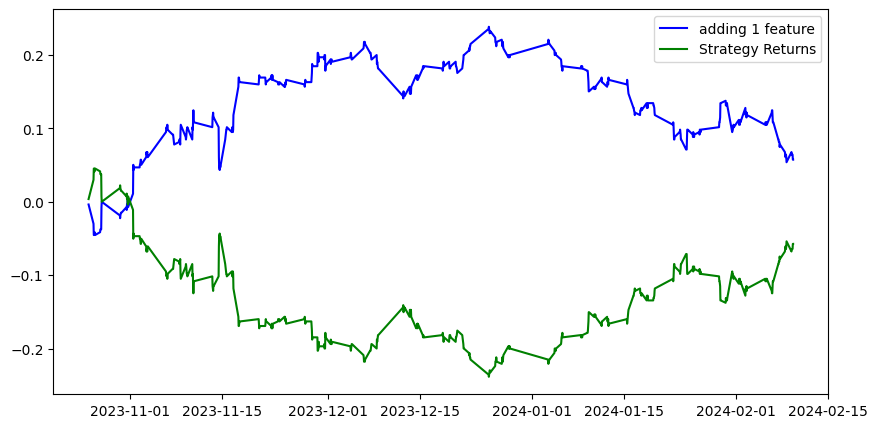

In [41]:

newdf['Predicted_Signal'] = model.predict(adding)
newdf['add_returns'] = np.log(newdf['Close']/newdf['Close'].shift(1))
Cumulative_add_returns = np.cumsum(newdf[split:]['add_returns'])

newdf['Strategy_returns'] = newdf['add_returns']* newdf['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(newdf[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_add_returns , color='b', label = 'adding 1 feature')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
#plt.plot(Cumulative_Strategy_returns1, color='g', label = 'Strategy Returns1')
plt.legend()
plt.show()